# Multilayer perceptron

## Data from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

PATH = '/content/gdrive/MyDrive/Creditcard_data/creditcard.csv';

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Credit card data

In [ ]:
import pandas as pd

creditcard_df = pd.read_csv(PATH)
creditcard_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
creditcard_df.shape

(284807, 31)

## Class-imbalance - fraud transactions

In [ ]:
creditcard_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Test Training Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X = creditcard_df.drop(['Class'],axis=1)
y = creditcard_df.Class

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.33)

print("train rows: {}, test rows: {}".format(X_train.shape[0], X_test.shape[0]))  # rows

train rows: 190820, test rows: 93987


## Multilayer perceptron classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

mlp.score(X_test, y_test)

0.997542213284816

## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred, labels=[1,0])

array([[  127,    35],
       [  196, 93629]])

In [ ]:
from sklearn.metrics import accuracy_score


tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
specificity = tn / (tn + fp) * 100
sensitivity = tp / (tp + fn) * 100
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"accuracy = {accuracy:.2f}%\nsensitivity = {sensitivity:.2f}%\nspecificity = {specificity:.2f}%\n")

accuracy = 99.75%
sensitivity = 78.40%
specificity = 99.79%



# Changing parameters of mlp

In [ ]:
from dataclasses import dataclass

@dataclass
class StatistictsData:
    name: str
    accuracy: float
    sensitivity: float
    specificity: float

def calculate_statistics(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp) * 100
    sensitivity = tp / (tp + fn) * 100
    accuracy = accuracy_score(y_test, y_pred) * 100

    return accuracy, sensitivity, specificity

In [ ]:
def run_mlp(X_train, X_test, y_train, **estimator_params):
    mlp = MLPClassifier(random_state=0, **estimator_params)
    y_pred = mlp.fit(X_train,y_train).fit(X_train, y_train).predict(X_test)
    return y_pred

In [ ]:
def mlp_evaluation(current_range, mlp_statistics_list, **mlp_params):
    y_pred = run_mlp(X_train, X_test, y_train, **mlp_params)
    stats = calculate_statistics(y_test, y_pred)
    mlp_stats = StatistictsData(current_range, *stats)
    mlp_statistics_list.append(mlp_stats)

In [ ]:
statistics_hidden_layers = [] # 1 2 3 4 5
statistics_n_neurons = [] # 100 200 300 400 500

In [ ]:
common_range = range(1, 6, 1)

for size in common_range:
    # statistics hidden layers
    mlp_evaluation(size, statistics_hidden_layers, hidden_layer_sizes=(100,)*size)
    # statistics n neurons
    mlp_evaluation(size, statistics_n_neurons, hidden_layer_sizes=(size*100,))

In [ ]:
statistics_hidden_layers_df = pd.DataFrame(statistics_hidden_layers)
statistics_hidden_layers_df.rename(columns={'name':'number of hidden layers'}, inplace=True)
statistics_n_neurons_df = pd.DataFrame(statistics_n_neurons)
statistics_n_neurons_df.rename(columns={'name':'number of neurons'}, inplace=True)
grouped_stats_dfs = [statistics_hidden_layers_df, statistics_n_neurons_df]

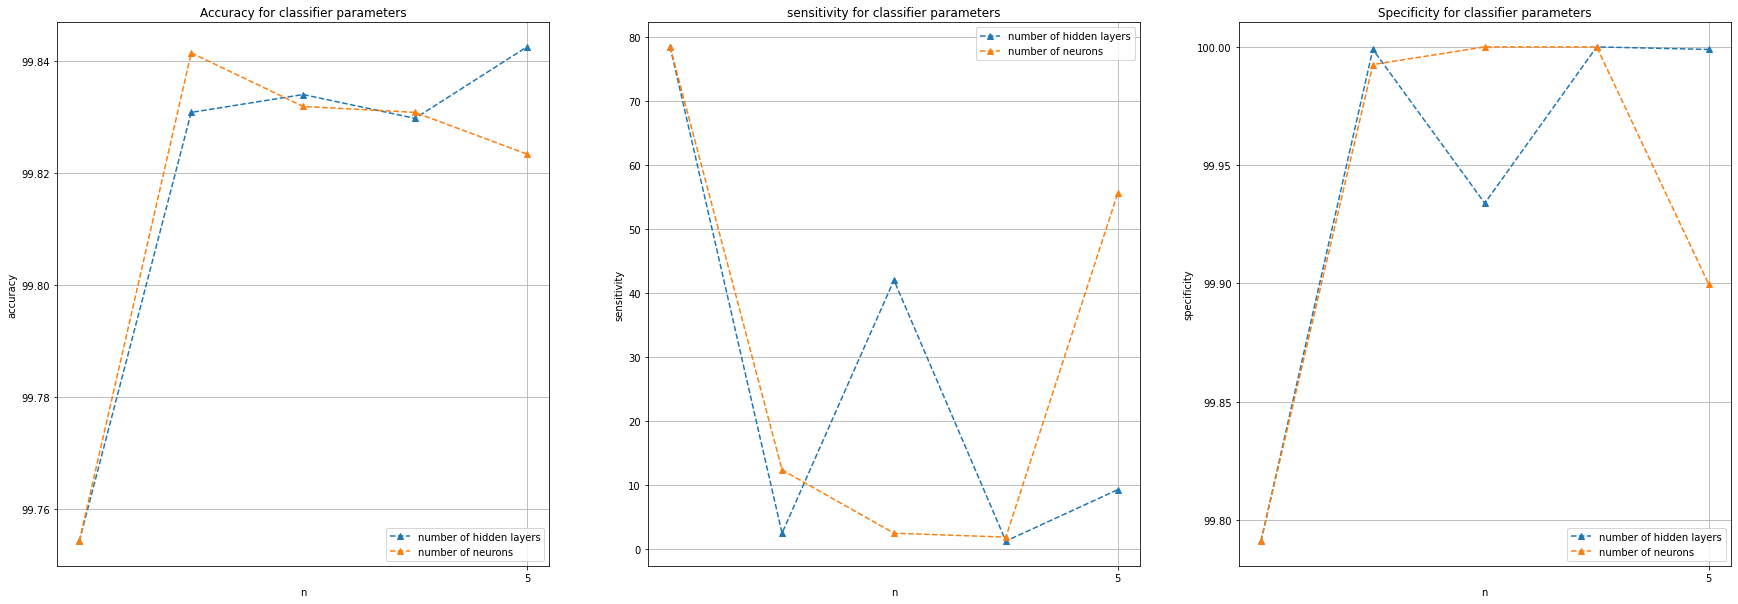

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

plot_style = {"marker": '^', "linestyle": '--'}
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

def plot_grouped_stats(ax, stats, stat_name):
    ax.plot(common_range, stats[0][stat_name], label="number of hidden layers", **plot_style)
    ax.plot(common_range, stats[1][stat_name], label="number of neurons", **plot_style)
    ax.grid(b=True)
    ax.legend()

for i,stat_name in enumerate(["accuracy", "sensitivity", "specificity"]):
    plot_grouped_stats(axs[i], grouped_stats_dfs, stat_name)

axs[0].set(xlabel='n', ylabel='accuracy',
        title='Accuracy for classifier parameters')
axs[1].set(xlabel='n', ylabel='sensitivity',
        title='sensitivity for classifier parameters')
axs[2].set(xlabel='n', ylabel='specificity',
        title='Specificity for classifier parameters')


loc = plticker.MultipleLocator(base=5.0)
for ax in axs:
    ax.xaxis.set_major_locator(loc)

plt.show()

## Conclusion

Accuracy and specificity are on level 99%. Sensitivity is the best for initial parameters, one hidden layer with 100 neurons.


# Balancing the training dataset

## Under Sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

sampled_dataset = RandomUnderSampler(random_state=0).fit_resample(X_train, y_train)

X_train_under, y_train_under = sampled_dataset

In [ ]:
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_under,y_train_under)

y_pred = mlp.predict(X_test)

mlp.score(X_test, y_test)

0.010352495557896305

In [ ]:
confusion_matrix(y_test, y_pred, labels=[1,0])

array([[  162,     0],
       [93014,   811]])

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
specificity = tn / (tn + fp) * 100
sensitivity = tp / (tp + fn) * 100
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"accuracy = {accuracy:.2f}%\nsensitivity = {sensitivity:.2f}%\nspecificity = {specificity:.2f}%\n")

accuracy = 1.04%
sensitivity = 100.00%
specificity = 0.86%



## Over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

sampled_dataset = RandomOverSampler(random_state=0).fit_resample(X_train, y_train)

X_train_over, y_train_over = sampled_dataset

In [ ]:
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_over,y_train_over)

y_pred = mlp.predict(X_test)

mlp.score(X_test, y_test)

0.972474916743805

In [ ]:
confusion_matrix(y_test, y_pred, labels=[1,0])

array([[  147,    15],
       [ 2572, 91253]])

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
specificity = tn / (tn + fp) * 100
sensitivity = tp / (tp + fn) * 100
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"accuracy = {accuracy:.2f}%\nsensitivity = {sensitivity:.2f}%\nspecificity = {specificity:.2f}%\n")

accuracy = 97.25%
sensitivity = 90.74%
specificity = 97.26%



## Smote

In [ ]:
from imblearn.over_sampling import  SMOTE

sampled_dataset = SMOTE(random_state=0).fit_resample(X_train, y_train)

X_train_smote, y_train_smote = sampled_dataset

In [ ]:
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_smote,y_train_smote)

y_pred = mlp.predict(X_test)

mlp.score(X_test, y_test)

0.9975209337461564

In [ ]:
confusion_matrix(y_test, y_pred, labels=[1,0])

array([[  138,    24],
       [  209, 93616]])

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
specificity = tn / (tn + fp) * 100
sensitivity = tp / (tp + fn) * 100
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"accuracy = {accuracy:.2f}%\nsensitivity = {sensitivity:.2f}%\nspecificity = {specificity:.2f}%\n")

accuracy = 99.75%
sensitivity = 85.19%
specificity = 99.78%



## Cluster Centroids

In [ ]:
from imblearn.under_sampling import ClusterCentroids

sampled_dataset = ClusterCentroids(random_state=0).fit_resample(X_train, y_train)

X_train_cluster, y_train_cluster = sampled_dataset

In [ ]:
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_cluster,y_train_cluster)

y_pred = mlp.predict(X_test)

mlp.score(X_test, y_test)

0.9970208645876557

In [ ]:
confusion_matrix(y_test, y_pred, labels=[1,0])

array([[   34,   128],
       [  152, 93673]])

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
specificity = tn / (tn + fp) * 100
sensitivity = tp / (tp + fn) * 100
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"accuracy = {accuracy:.2f}%\nsensitivity = {sensitivity:.2f}%\nspecificity = {specificity:.2f}%\n")

accuracy = 99.70%
sensitivity = 20.99%
specificity = 99.84%



## SMOTETomek

In [ ]:
from imblearn.combine import  SMOTETomek

sampled_dataset = SMOTETomek(random_state=0).fit_resample(X_train, y_train)

X_train_smote, y_train_smote = sampled_dataset

In [ ]:
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_smote,y_train_smote)

y_pred = mlp.predict(X_test)

mlp.score(X_test, y_test)

0.9933075850915553

In [11]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
specificity = tn / (tn + fp) * 100
sensitivity = tp / (tp + fn) * 100
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"accuracy = {accuracy:.2f}%\nsensitivity = {sensitivity:.2f}%\nspecificity = {specificity:.2f}%\n")

accuracy = 99.33%
sensitivity = 86.42%
specificity = 99.35%



## Conclusion

For MLP algorithm with Over Sampling for training dataset is the best to improve sensitivity and the model does not lose so much accuracy and specificity. SMOTE and SMOTETOMEK are also good.